# Model 2

#Libraries

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import csv


# Data Importing and Selection 

Reading the dataset

In [217]:
url = 'https://raw.githubusercontent.com/harshvijay2776/Data-Science/main/recruitmentdataset-2022-1.3.csv'
dataset = pd.read_csv(url)
dataset.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


Datset for Company A

In [218]:
company_a = pd.DataFrame(dataset)
dataset_company_a = company_a[company_a["company"] == "A"]
dataset_company_a.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


Correlation Matrix

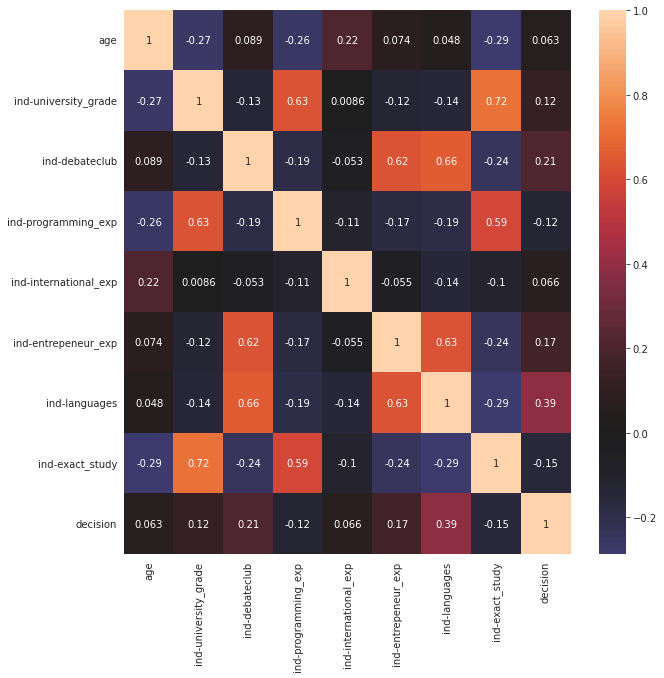

In [219]:
matrix = dataset_company_a.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot =True, center=0)

Label encoding of all the indicators

In [220]:
indicators = dataset_company_a[["ind-university_grade", "ind-debateclub" , "ind-programming_exp", "ind-international_exp",
                      "ind-entrepeneur_exp", "ind-languages", "ind-exact_study", "ind-degree",]]
indicators['ind-degree'] = preprocessing.LabelEncoder().fit_transform(indicators['ind-degree'])
indicators = indicators.astype(int)
indicators.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree
0,70,0,0,0,0,1,1,2
1,67,0,1,0,0,2,1,0
2,67,0,1,1,0,0,1,1
3,70,0,1,0,0,1,1,1
4,59,0,0,0,0,1,0,1


# Data Exploration

Decision graph for company A

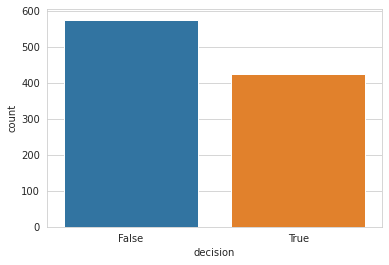

In [221]:
sns.countplot(x= "decision", data = dataset_company_a)
plt.show()

Ind-languages with decision

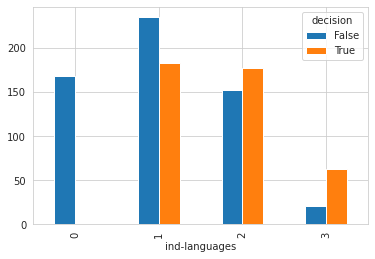

In [222]:
pd.crosstab(dataset_company_a["ind-languages"],dataset_company_a.decision).plot(kind = "bar")

Ind-debateclub with decision

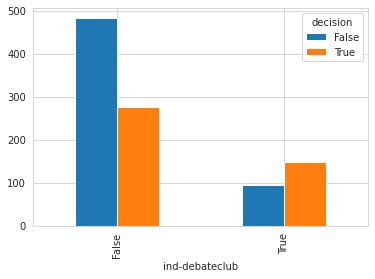

In [223]:
pd.crosstab(dataset_company_a["ind-debateclub"],dataset_company_a.decision).plot(kind = "bar")

Ind-entrepeneur with decision

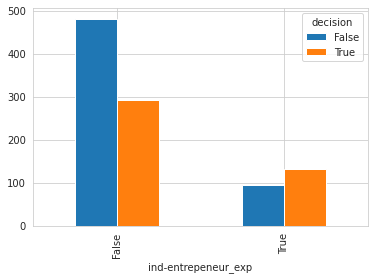

In [224]:
pd.crosstab(dataset_company_a["ind-entrepeneur_exp"],dataset_company_a.decision).plot(kind = "bar")

Ind-university_grade with decision

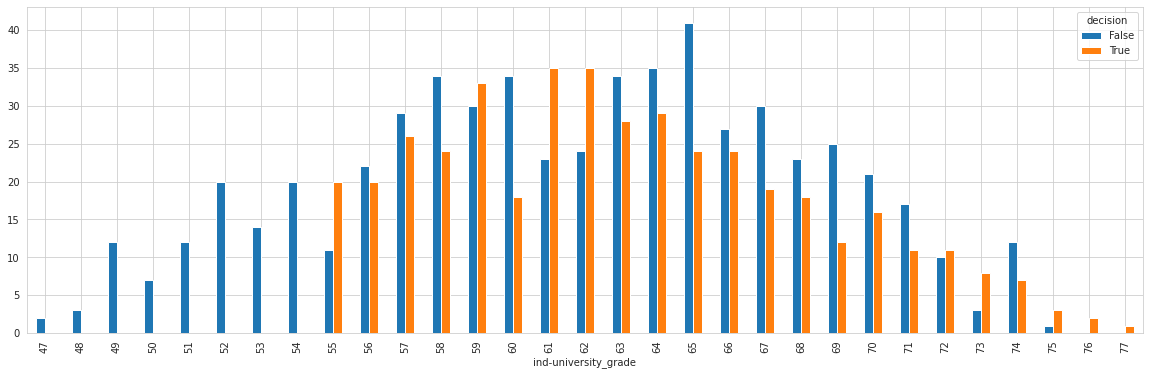

In [225]:
pd.crosstab(dataset_company_a["ind-university_grade"],dataset_company_a.decision).plot(kind = "bar", figsize = (20,6))

Ind-degree with decision

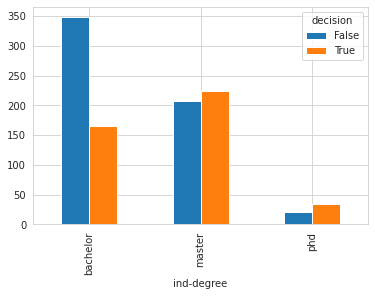

In [226]:
pd.crosstab(dataset_company_a["ind-degree"],dataset_company_a.decision).plot(kind = "bar")

Ind-exact_study with decision

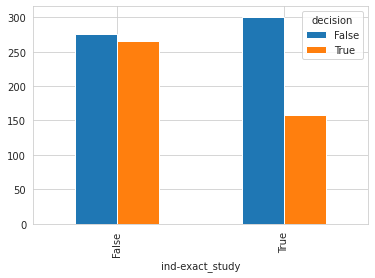

In [227]:
pd.crosstab(dataset_company_a["ind-exact_study"],dataset_company_a.decision).plot(kind = "bar")

Ind-programming_exp with decision

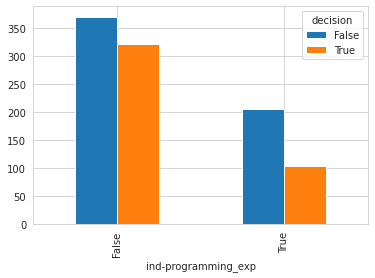

In [228]:
pd.crosstab(dataset_company_a["ind-programming_exp"],dataset_company_a.decision).plot(kind = "bar")

Ind-international with decision

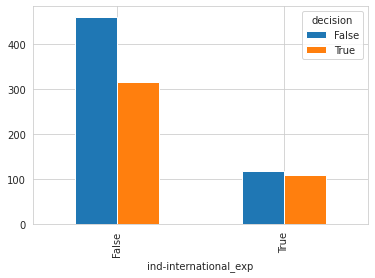

In [229]:
pd.crosstab(dataset_company_a["ind-international_exp"],dataset_company_a.decision).plot(kind = "bar")


# Model

In [230]:
X = indicators
Y = dataset_company_a["decision"]


Training the model

In [231]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.32,random_state=42)

# All Models

Logistic Regression

In [232]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100
y_lr = lr.predict(X_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 72.50%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


rbf SVM

In [233]:
model=svm.SVC(kernel='rbf',C=0.6,gamma=0.4)
model.fit(X_train,y_train)
acc = model.score(X_test,y_test)*100

y_svc = model.predict(X_test)

accuracies['rbf SVM'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 77.50%


Decision Tree Classifier

In [234]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

acc = model.score(X_test,y_test)*100

y_dtc = model.predict(X_test)

accuracies['Decision Tree'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 73.12%


K Neighbors Classifier

In [235]:
model=KNeighborsClassifier(n_neighbors = 9) 
model.fit(X_train,y_train)

acc = model.score(X_test,y_test)*100
train_acc = model.score(X_train,y_train)*100

y_knn_highest = model.predict(X_test)

accuracies['Model 2: KNN (All Indicators)'] = acc
print("Test Accuracy {:.2f}%".format(acc))
print("Train Accuracy {:.2f}%".format(train_acc))

Test Accuracy 78.44%
Train Accuracy 79.12%


Gaussian NB

In [236]:
model=GaussianNB()
model.fit(X_train,y_train)
acc = model.score(X_test,y_test)*100

y_gnb = model.predict(X_test)

accuracies['GaussianNB'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 70.94%


Random Forest Classifier

In [237]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

acc = model.score(X_test,y_test)*100

y_rfc = model.predict(X_test)

accuracies['Random Forest Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 73.12%


# Hyperparameter tuning for SVM and KNN 

SVM 

In [238]:
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.759
SVC(C=0.6, gamma=0.4)


KNN

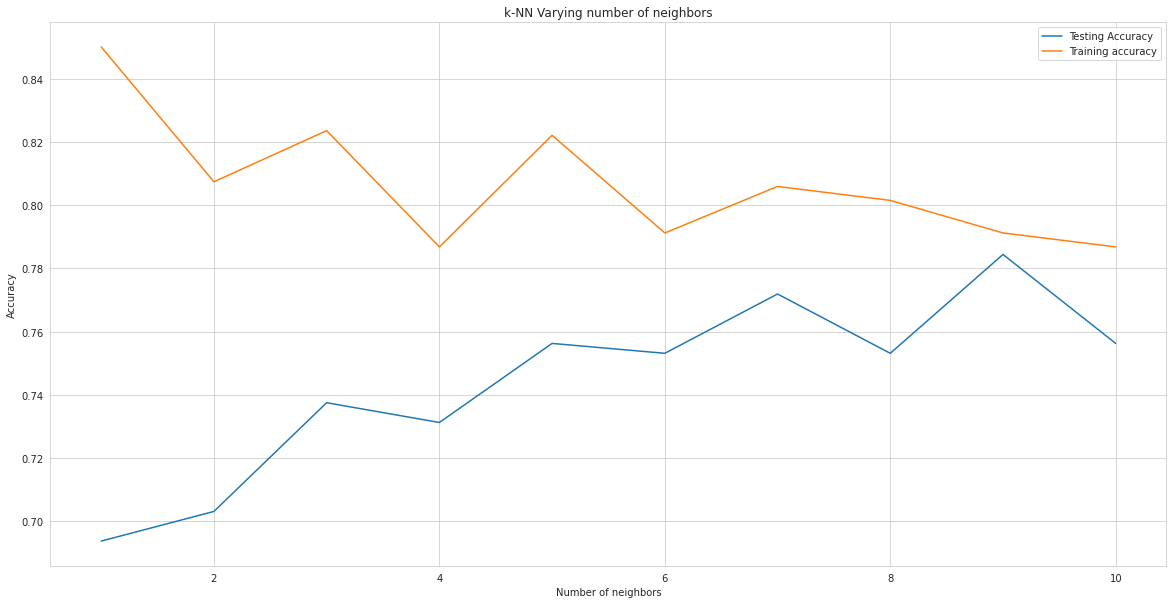

In [239]:
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(X_train, y_train)   
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.figure(figsize = (20,10)) 
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# KNN with different set of indicators

Set of four indicators

In [240]:
X = dataset_company_a[["ind-entrepeneur_exp", "ind-debateclub", "ind-languages", "ind-university_grade"]]
y = dataset_company_a["decision"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.32,random_state=42)

knn=KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train,y_train)

acc = knn.score(X_test,y_test)*100
train_acc = knn.score(X_train,y_train)*100

y_knn = knn.predict(X_test)

accuracies['Model 2 : KNN with 4 indicators'] = acc
print("Test Accuracy {:.2f}%".format(acc))
print("Train Accuracy {:.2f}%".format(train_acc))

Test Accuracy 70.31%
Train Accuracy 72.79%


Set of six indicators

In [241]:
X = dataset_company_a[["ind-entrepeneur_exp", "ind-debateclub", "ind-languages", "ind-university_grade", "ind-exact_study", "ind-international_exp"]]
y = dataset_company_a["decision"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.32,random_state=42)
knn=KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train,y_train)

acc = knn.score(X_test,y_test)*100
train_acc = knn.score(X_train,y_train)*100

y_knn = knn.predict(X_test)

accuracies['Model 2 : KNN with 6 indicators'] = acc
print("Test Accuracy {:.2f}%".format(acc))
print("Train Accuracy {:.2f}%".format(train_acc))

Test Accuracy 74.06%
Train Accuracy 75.29%


Set of two indicators

In [242]:
X = dataset_company_a[["ind-debateclub", "ind-languages"]]
y = dataset_company_a["decision"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.32,random_state=42)
knn=KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train,y_train)

acc = knn.score(X_test,y_test)*100
train_acc = knn.score(X_train,y_train)*100

y_knn = knn.predict(X_test)

accuracies['Model 2 : KNN with 2 indicators'] = acc
print("Test Accuracy {:.2f}%".format(acc))
print("Train Accuracy {:.2f}%".format(train_acc))

Test Accuracy 63.12%
Train Accuracy 62.79%


# Comparing Models

KNN has the highest accuracy

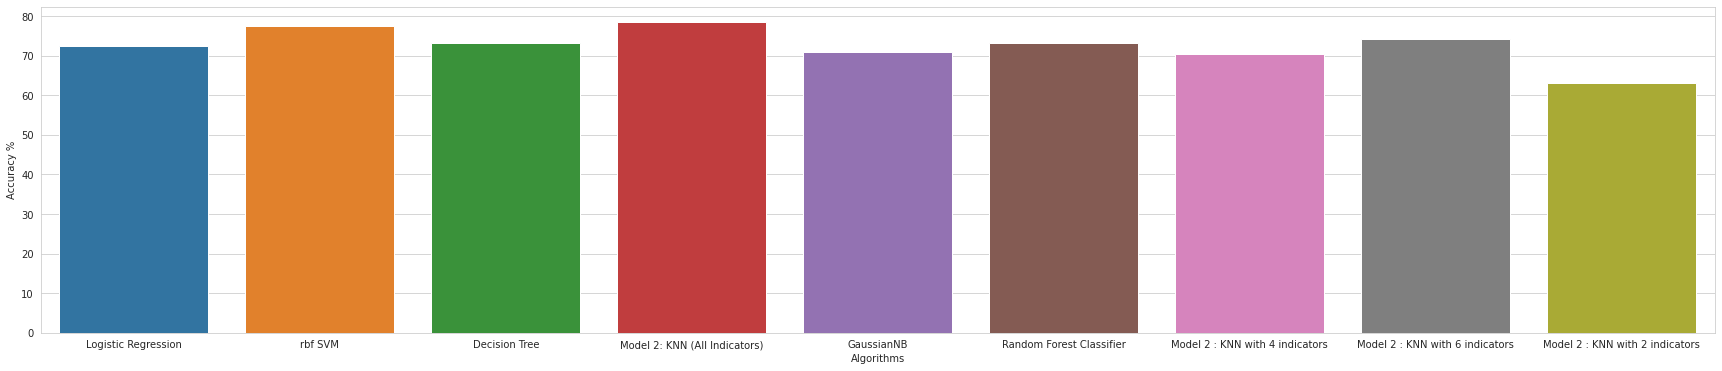

In [243]:
sns.set_style("whitegrid")
plt.figure(figsize = (30,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

# Models Confusion Matrix

All Models

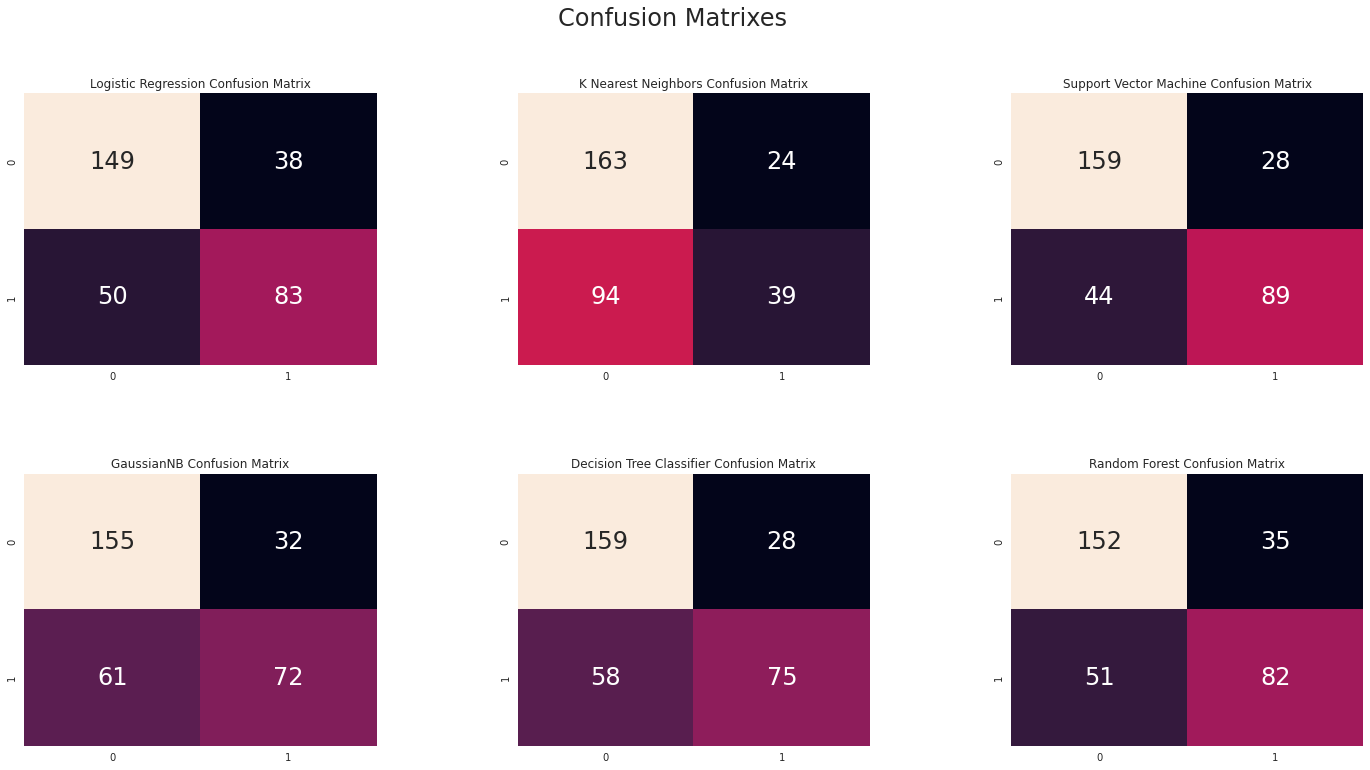

In [244]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_lr),annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_knn),annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_svc),annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("GaussianNB Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_gnb),annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_dtc),annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_rfc),annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

KNN

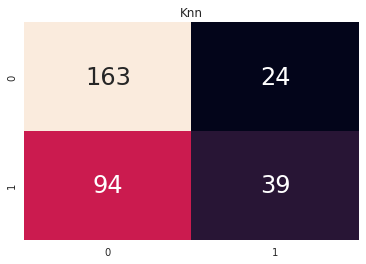

In [245]:
plt.title("Knn")
sns.heatmap(confusion_matrix(y_test, y_knn),annot=True,fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

SVM

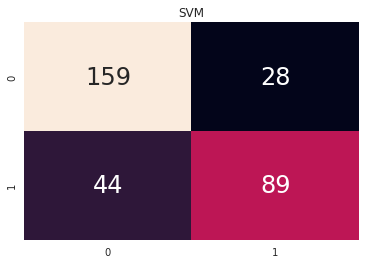

In [246]:
plt.title("SVM")
sns.heatmap(confusion_matrix(y_test, y_svc),annot=True,fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

In [247]:
pd.crosstab(y_test, y_knn, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,163,24,187
True,94,39,133
All,257,63,320


# Classification Report


KNN

In [248]:
print(classification_report(y_test,y_knn_highest))

              precision    recall  f1-score   support

       False       0.78      0.88      0.83       187
        True       0.80      0.65      0.71       133

    accuracy                           0.78       320
   macro avg       0.79      0.76      0.77       320
weighted avg       0.79      0.78      0.78       320



# ROC curve

In [249]:
y_pred_proba = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_knn_highest)

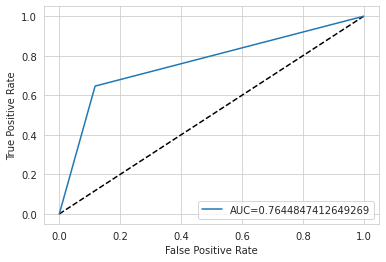

In [256]:
plt.plot([0,1],[0,1],'k--')
auc = metrics.roc_auc_score(y_test, y_knn_highest)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Cross Validation

Grid search cross validation - KNN

In [262]:
X = indicators
Y = dataset_company_a["decision"]

In [263]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [264]:
knn_cv.best_score_

0.744

k-fold - KNN

In [265]:
knn_cv = KNeighborsClassifier(n_neighbors = 9)
cv_scores = cross_val_score(knn_cv, X, Y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.74 0.74 0.71 0.79 0.74 0.79 0.7  0.69 0.71 0.73]
cv_scores mean:0.734


# Results csv

Running kfold 200 to get an array with the result

In [266]:
knn_cv = KNeighborsClassifier(n_neighbors = 9)
range_200 = range(1,201)
scores = list()
for i in range_200:
  cv_scores = cross_val_score(knn_cv,X,Y,cv = 10)*100
  scores.append(np.mean(cv_scores))

In [267]:
f = open('/Model2.csv', 'w')
writer = csv.writer(f)
row = list(range(1,201))
writer.writerow(row)
writer.writerow(scores)
f.close()